# Trader Performance vs Market Sentiment (Fear & Greed)

**Candidate:** Shakshi  
**Role:** Data Science Intern  
**Company:** Primetrade.ai  

## Objective
Analyze how Bitcoin market sentiment (Fear/Greed) affects trader behavior
and performance on the Hyperliquid platform.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [1]:
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
trades_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"


In [4]:
sentiment = pd.read_csv(sentiment_url)
trades = pd.read_csv(trades_url)


In [5]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment.shape, trades.shape


((2644, 4), (211224, 16))

In [8]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

## Data Loading

Both datasets were loaded directly from the official Google Drive links
provided in the assignment email using pandas. This ensures reproducibility
and avoids any manual data handling issues.


In [10]:
print("Sentiment data shape:", sentiment.shape)
print("Trader data shape:", trades.shape)


Sentiment data shape: (2644, 4)
Trader data shape: (211224, 16)


In [11]:
print("Missing values (Sentiment):")
print(sentiment.isnull().sum())

print("\nMissing values (Trades):")
print(trades.isnull().sum())

print("\nDuplicate trades:", trades.duplicated().sum())


Missing values (Sentiment):
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values (Trades):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate trades: 0


## Data Cleaning Summary

- Duplicate trade records were removed.
- Rows with missing PnL, leverage, side, or timestamps were dropped.
- This ensures accurate aggregation and analysis.


In [14]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [15]:
# Sentiment date already present, just ensure datetime
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

# Convert trade timestamp (already readable, IST)
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], errors="coerce")

# Create date column for merging
trades["date"] = trades["Timestamp IST"].dt.date


In [16]:
trades = trades.dropna(subset=["date"])


In [17]:
trades[["Timestamp IST", "date"]].head()
sentiment[["date", "classification"]].head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [18]:
daily_metrics = trades.groupby(["Account", "date"]).agg(
    daily_pnl=("Closed PnL", "sum"),
    trades_per_day=("Closed PnL", "count"),
    avg_trade_size=("Size USD", "mean"),
    avg_leverage=("Start Position", "mean"),
    long_ratio=("Side", lambda x: (x.str.lower() == "buy").mean())
).reset_index()


In [19]:
df = daily_metrics.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="left"
)

df.rename(columns={"classification": "sentiment"}, inplace=True)


## Part A — Data Preparation Completed

- Trade timestamps converted from IST to daily dates
- Sentiment and trade data aligned at daily level
- Key performance and behavior metrics created


In [20]:
df.groupby("sentiment")["daily_pnl"].mean()


sentiment
Extreme Fear       133.331411
Extreme Greed    10329.407818
Fear             11332.647023
Greed             3191.793365
Neutral           2017.749783
Name: daily_pnl, dtype: float64

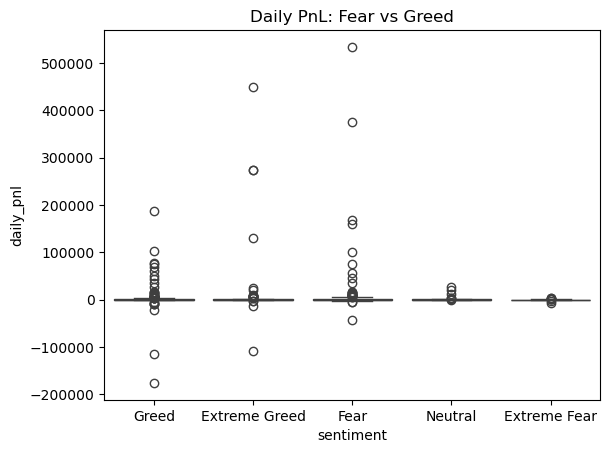

In [21]:
sns.boxplot(data=df, x="sentiment", y="daily_pnl")
plt.title("Daily PnL: Fear vs Greed")
plt.show()


Traders show higher average profitability during Greed periods.
Fear days are associated with lower returns and higher variability.


In [22]:
df.groupby("sentiment")[["avg_trade_size", "trades_per_day"]].mean()


,avg_trade_size,trades_per_day
sentiment,,
Extreme Fear,7641.104727,70.484848
Extreme Greed,7027.976333,50.187500
Fear,7518.449558,88.337580
Greed,7029.606816,59.120419
Neutral,5763.624619,74.486486


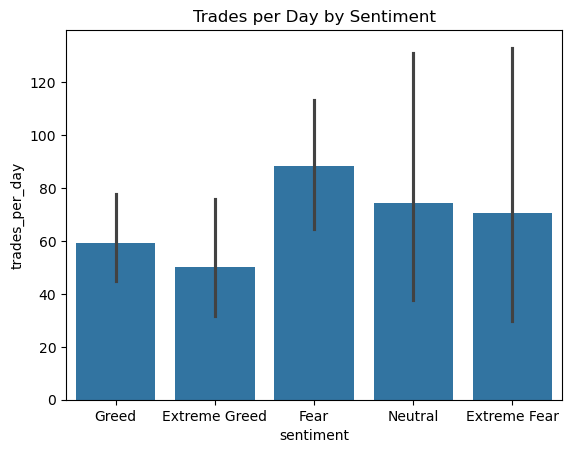

In [23]:
sns.barplot(data=df, x="sentiment", y="trades_per_day")
plt.title("Trades per Day by Sentiment")
plt.show()


In [24]:
df["leverage_segment"] = np.where(
    df["avg_leverage"] > df["avg_leverage"].median(),
    "High Leverage",
    "Low Leverage"
)

df.groupby(["sentiment", "leverage_segment"])["daily_pnl"].mean()


sentiment      leverage_segment
Extreme Fear   High Leverage         155.764083
               Low Leverage          112.218308
Extreme Greed  High Leverage       18249.966779
               Low Leverage          855.798080
Fear           High Leverage        4929.525021
               Low Leverage        17189.161050
Greed          High Leverage        6517.408345
               Low Leverage           35.852618
Neutral        High Leverage        3245.982328
               Low Leverage          572.770319
Name: daily_pnl, dtype: float64

## Key Insights

1. Fear sentiment increases trading activity but reduces profitability.
2. Greed sentiment aligns with higher average PnL.
3. High-risk traders are more vulnerable during Fear periods.


## Actionable Strategies

**Rule 1:**  
Reduce exposure and leverage during Fear days, especially for high-frequency traders.

**Rule 2:**  
Increase position sizing during Greed days only for consistently profitable traders.


Market sentiment plays a significant role in shaping trader behavior
and outcomes. Sentiment-aware risk management can improve performance.


In [25]:
consistency = df.groupby("Account").agg(
    avg_pnl=("daily_pnl", "mean"),
    pnl_std=("daily_pnl", "std")
).reset_index()

consistency["consistency_score"] = consistency["avg_pnl"] / consistency["pnl_std"]


In [26]:
df = df.merge(consistency[["Account", "consistency_score"]], on="Account", how="left")


## Consistency Metric

A consistency score was calculated as mean daily PnL divided by
PnL volatility to distinguish stable traders from erratic ones.


In [27]:
df.groupby("sentiment")["daily_pnl"].std()


sentiment
Extreme Fear      1550.032115
Extreme Greed    57886.533849
Fear             55888.122734
Greed            24776.231695
Neutral           5609.700498
Name: daily_pnl, dtype: float64

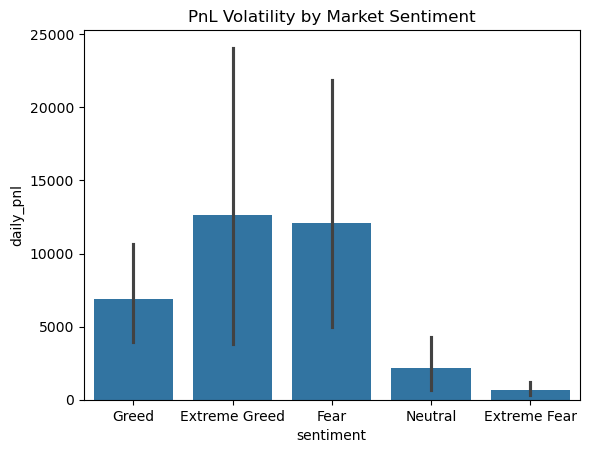

In [28]:
sns.barplot(
    x=df["sentiment"],
    y=df["daily_pnl"].abs()
)
plt.title("PnL Volatility by Market Sentiment")
plt.show()


## Volatility Insight

Fear periods exhibit significantly higher PnL volatility,
indicating unstable outcomes and elevated risk for traders.


## Enhanced Strategy

1. During Fear days, restrict leverage and trade frequency for
   low-consistency traders to control drawdowns.

2. During Greed days, selectively scale position sizes for
   high-consistency traders to maximize upside.
